In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib2tikz

In [311]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8)})

def increase_linewidth(ax):
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    leg = ax.legend()
    leg_lines = leg.get_lines()
    plt.setp(leg_lines, linewidth=5)

In [312]:
question_type = "force"
directory = "cell_type_choice_plots/"
stats = pd.read_hdf("cell_type_choice_plots/"+question_type+"_stats.h5")

In [313]:
if question_type == "force":
    stats.cell_type = stats.cell_type + "_old"
    stats.loc[stats.cell_type == "GRU_old", "cell_type"] = "RNN"
    stats.loc[stats.cell_type == "RNN_old", "cell_type"] = "LSTM"
    stats.loc[stats.cell_type == "LSTM_old", "cell_type"] = "GRU"

In [314]:
stats = stats.rename({"cell_type": "cell type"}, axis="columns")

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


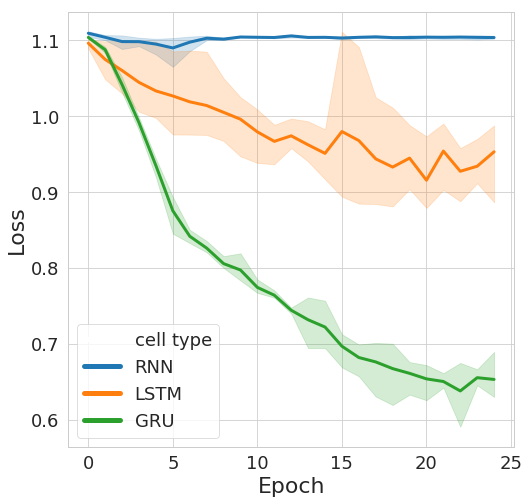

In [315]:
ax = sns.lineplot(x="Epoch", y="Loss", hue="cell type",  markers=True, data=stats, hue_order=["RNN", "LSTM", "GRU"])
increase_linewidth(ax)
plt.savefig(directory+question_type+"_losses.pdf")

stats.groupby("cell type").max()[["Train Accuracy", "Val Accuracy"]].plot.bar()
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("")
matplotlib2tikz.save("cell_type_choice_plots/"+question_type+"_acc_hist.tikz")

for label in stats.cell_type.unique():
    sns.lineplot(x="Epoch", y="Val Accuracy", data=stats[stats.cell_type == label])
    sns.lineplot(x="Epoch", y="Train Accuracy", data=stats[stats.cell_type == label])
    
    plt.title(label)
    plt.legend(labels=["Validation", "Training"], loc=2)
    plt.ylabel("Accuracy")
    plt.grid()
    matplotlib2tikz.save("cell_type_choice_plots/"+question_type+"_"+label+"_acc_plot.tikz")
    plt.show()

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


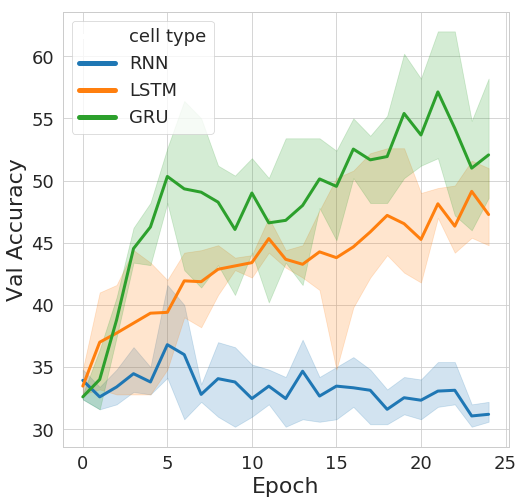

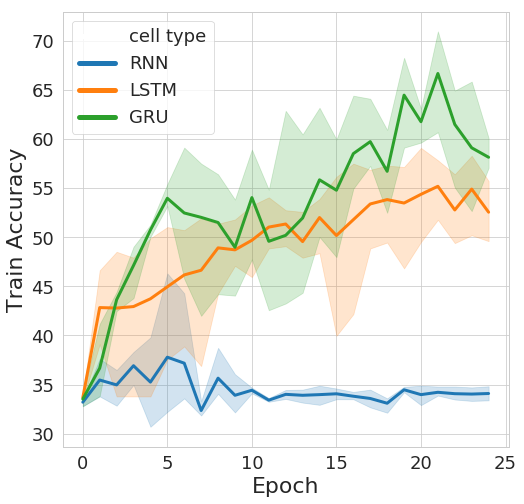

In [316]:
ax = sns.lineplot(x="Epoch", y="Val Accuracy", hue="cell type", data=stats, hue_order=["RNN", "LSTM", "GRU"])
increase_linewidth(ax)
plt.savefig(directory+question_type+"_all_val_acc_plot.pdf")
plt.show()
ax = sns.lineplot(x="Epoch", y="Train Accuracy", hue="cell type", data=stats, hue_order=["RNN", "LSTM", "GRU"])
increase_linewidth(ax)
plt.savefig(directory+question_type+"_all_train_acc_plot.pdf")